In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
!pip install citipy

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | galiwinku
City not found. Skipping...
Processing Record 2 of Set 1 | casper
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tchaourou
Processing Record 8 of Set 1 | bambanglipuro
Processing Record 9 of Set 1 | nea mikhaniona
City not found. Skipping...
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | nhulunbuy
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | nelson bay
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | ouallam
Processing Record 18 of Set 1 | os
City not found. Skipping...
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | isa

Processing Record 39 of Set 4 | poronaysk
Processing Record 40 of Set 4 | sigli
Processing Record 41 of Set 4 | agustin codazzi
Processing Record 42 of Set 4 | balky
Processing Record 43 of Set 4 | ahipara
Processing Record 44 of Set 4 | abdulino
Processing Record 45 of Set 4 | nicoya
Processing Record 46 of Set 4 | provideniya
Processing Record 47 of Set 4 | taburao
City not found. Skipping...
Processing Record 48 of Set 4 | marsh harbour
Processing Record 49 of Set 4 | pemberton
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | komsomolskiy
Processing Record 2 of Set 5 | rawson
Processing Record 3 of Set 5 | talas
Processing Record 4 of Set 5 | mawlamyine
Processing Record 5 of Set 5 | butaritari
Processing Record 6 of Set 5 | namanga
Processing Record 7 of Set 5 | tabou
Processing Record 8 of Set 5 | san patricio
Processing Record 9 of Set 5 | porbandar
Processing Record 10 of Set 5 | port-gentil
Processing Record 11 of Set 5 | grindavik
Processing Record 12 of

Processing Record 28 of Set 8 | labuhan
Processing Record 29 of Set 8 | alofi
Processing Record 30 of Set 8 | sehithwa
Processing Record 31 of Set 8 | same
Processing Record 32 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 33 of Set 8 | markova
Processing Record 34 of Set 8 | ghanzi
Processing Record 35 of Set 8 | arroyo
Processing Record 36 of Set 8 | funehiki
Processing Record 37 of Set 8 | khonuu
City not found. Skipping...
Processing Record 38 of Set 8 | yabassi
Processing Record 39 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 8 | tawkar
City not found. Skipping...
Processing Record 41 of Set 8 | klaksvik
Processing Record 42 of Set 8 | arlit
Processing Record 43 of Set 8 | nara
Processing Record 44 of Set 8 | yulara
Processing Record 45 of Set 8 | victoria
Processing Record 46 of Set 8 | gamba
Processing Record 47 of Set 8 | seymchan
Processing Record 48 of Set 8 | tadine
Processing Record 49 of Set 8 | sarnen
Processing Record

Processing Record 6 of Set 12 | sayat
Processing Record 7 of Set 12 | shenjiamen
Processing Record 8 of Set 12 | japura
Processing Record 9 of Set 12 | verkhnyaya inta
Processing Record 10 of Set 12 | lubartow
Processing Record 11 of Set 12 | ushtobe
Processing Record 12 of Set 12 | bestobe
Processing Record 13 of Set 12 | chegdomyn
Processing Record 14 of Set 12 | burnie
Processing Record 15 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 16 of Set 12 | chlorakas
Processing Record 17 of Set 12 | inyonga
Processing Record 18 of Set 12 | stepnyak
Processing Record 19 of Set 12 | fairbanks
Processing Record 20 of Set 12 | atambua
Processing Record 21 of Set 12 | surt
Processing Record 22 of Set 12 | liwale
Processing Record 23 of Set 12 | azare
Processing Record 24 of Set 12 | tautira
Processing Record 25 of Set 12 | ixtapa
Processing Record 26 of Set 12 | konin
Processing Record 27 of Set 12 | auki
Processing Record 28 of Set 12 | kembe
Processing Record 29 of Set 12 

In [9]:
len(city_data)

574

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Casper,42.87,-106.31,64.40,52,90,33.33,US,2020-06-22 02:33:32
1,Khatanga,71.97,102.50,67.08,49,88,7.05,RU,2020-06-22 02:33:32
2,Kavieng,-2.57,150.80,85.86,66,11,5.23,PG,2020-06-22 02:33:33
3,Punta Arenas,-53.15,-70.92,32.00,83,96,5.82,CL,2020-06-22 02:33:33
4,Ushuaia,-54.80,-68.30,35.60,80,45,3.36,AR,2020-06-22 02:30:10
5,Tchaourou,8.89,2.60,71.85,97,100,6.58,BJ,2020-06-22 02:33:33
6,Bambanglipuro,-7.95,110.28,83.44,74,76,14.25,ID,2020-06-22 02:33:34
7,Avarua,-21.21,-159.78,75.20,64,90,17.22,CK,2020-06-22 02:33:34
8,Vaini,-21.20,-175.20,80.60,88,40,8.05,TO,2020-06-22 02:33:35
9,Nhulunbuy,-12.23,136.77,80.08,68,34,16.13,AU,2020-06-22 02:33:35


In [11]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Casper,US,2020-06-22 02:33:32,42.87,-106.31,64.40,52,90,33.33
1,Khatanga,RU,2020-06-22 02:33:32,71.97,102.50,67.08,49,88,7.05
2,Kavieng,PG,2020-06-22 02:33:33,-2.57,150.80,85.86,66,11,5.23
3,Punta Arenas,CL,2020-06-22 02:33:33,-53.15,-70.92,32.00,83,96,5.82
4,Ushuaia,AR,2020-06-22 02:30:10,-54.80,-68.30,35.60,80,45,3.36
5,Tchaourou,BJ,2020-06-22 02:33:33,8.89,2.60,71.85,97,100,6.58
6,Bambanglipuro,ID,2020-06-22 02:33:34,-7.95,110.28,83.44,74,76,14.25
7,Avarua,CK,2020-06-22 02:33:34,-21.21,-159.78,75.20,64,90,17.22
8,Vaini,TO,2020-06-22 02:33:35,-21.20,-175.20,80.60,88,40,8.05
9,Nhulunbuy,AU,2020-06-22 02:33:35,-12.23,136.77,80.08,68,34,16.13


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import Time.
import time

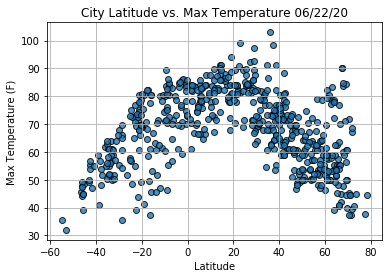

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

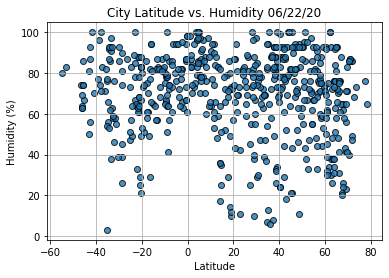

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

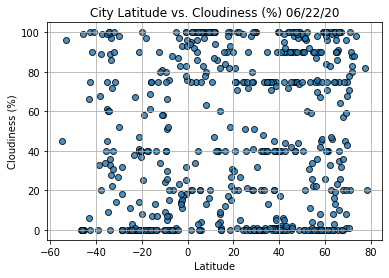

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

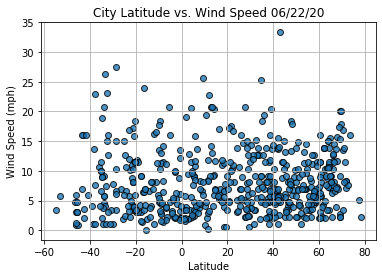

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression
from scipy.stats import linregress

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

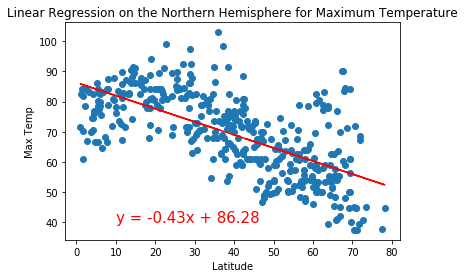

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

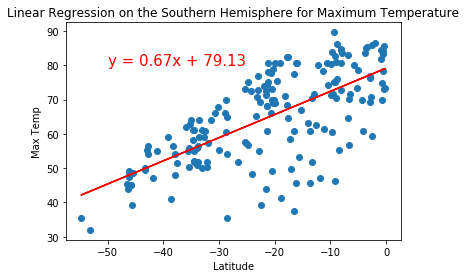

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

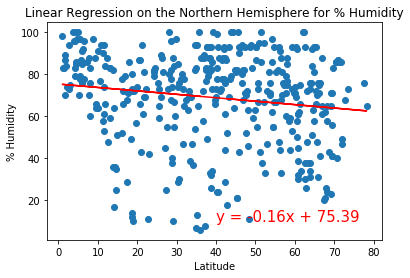

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Humidity", "% Humidity",(40,10))

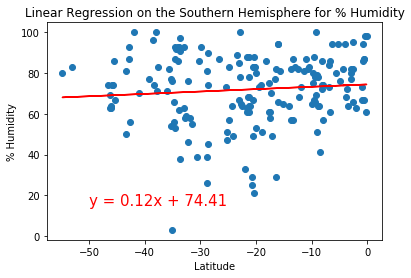

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for % Humidity", "% Humidity",(-50,15))

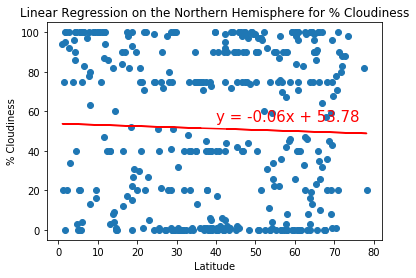

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Cloudiness", "% Cloudiness",(40,55))

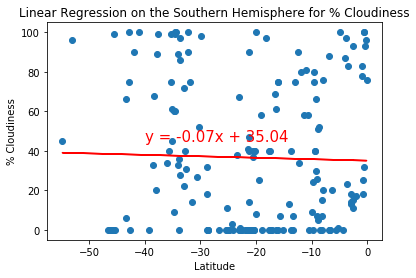

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for % Cloudiness", "% Cloudiness",(-40,45))

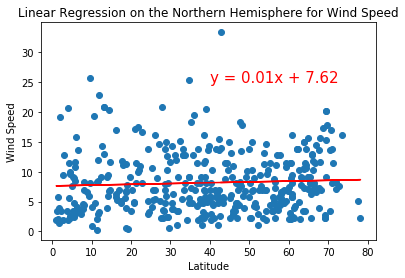

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed", "Wind Speed",(40,25))

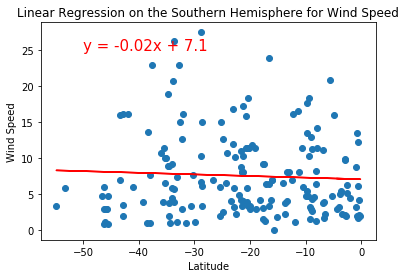

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Wind Speed", "Wind Speed",(-50,25))